<a href="https://colab.research.google.com/github/Anirudh1905/Fake-News-Classifier/blob/master/Fake_News_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake News Classifier

In [1]:
!pip install tf-nightly
!pip install multiprocess

## Importing the Data

In [2]:
import time
import nltk
import re
import pandas as pd
import numpy as np
import tensorflow as tf
from nltk.stem import WordNetLemmatizer
import multiprocess as mp
from nltk.corpus import stopwords
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


In [3]:
df = pd.read_csv('data.csv')
df.head()

,title,text,subject,date,labels
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [4]:
df.dropna(inplace=True)

In [5]:
df = df.rename(columns={"labels":"label"})

In [6]:
x=df.drop('label',axis=1)
y=df['label']

In [7]:
x.shape

(44898, 4)

In [8]:
y.shape

(44898,)

In [18]:
vocab_size=10000

In [19]:
messages=x.copy()

In [20]:
messages['text'][1]

'Ever get the feeling your life circles the roundabout rather than heads in a straight line toward the intended destination? [Hillary Clinton remains the big woman on campus in leafy, liberal Wellesley, Massachusetts. Everywhere else votes her most likely to don her inauguration dress for the remainder of her days the way Miss Havisham forever wore that wedding dress.  Speaking of Great Expectations, Hillary Rodham overflowed with them 48 years ago when she first addressed a Wellesley graduating class. The president of the college informed those gathered in 1969 that the students needed â\x80\x9cno debate so far as I could ascertain as to who their spokesman was to beâ\x80\x9d (kind of the like the Democratic primaries in 2016 minus the   terms unknown then even at a Seven Sisters school). â\x80\x9cI am very glad that Miss Adams made it clear that what I am speaking for today is all of us â\x80\x94  the 400 of us,â\x80\x9d Miss Rodham told her classmates. After appointing herself Edger

In [21]:
messages.reset_index(inplace=True)

In [22]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

## Data Preprocessing

In [26]:
def preprocess(msg):
    rv=re.sub('[^a-zA-Z]',' ',msg)
    rv=rv.lower()
    # rv=rv.split()
    # rv=[lm.lemmatize(word) for word in rv if not word in stopwords.words('english')]
    # rv=' '.join(rv)
    return rv

In [27]:
lm=WordNetLemmatizer()
corpus=[]

with mp.Pool(30) as pool:
    corpus=pool.map(preprocess,messages['text'])

In [29]:
x['text'] = corpus

In [28]:
corpus[0]

'house dem aide  we didn   t even see comey   s letter until jason chaffetz tweeted it by darrell lucus on october          subscribe jason chaffetz on the stump in american fork  utah   image courtesy michael jolley  available under a creative commons by license    with apologies to keith olbermann  there is no doubt who the worst person in the world is this week   fbi director james comey  but according to a house democratic aide  it looks like we also know who the second worst person is as well  it turns out that when comey sent his now infamous letter announcing that the fbi was looking into emails that may be related to hillary clinton   s email server  the ranking democrats on the relevant committees didn   t hear about it from comey  they found out via a tweet from one of the republican committee chairmen    as we now know  comey notified the republican chairmen and democratic ranking members of the house intelligence  judiciary  and oversight committees that his agency was revi

In [ ]:
one_hot_rp=[one_hot(words,vocab_size)for words in corpus]
one_hot_rp[0]

[1072,
 7586,
 8104,
 6533,
 40,
 6952,
 1515,
 6685,
 8415,
 7369,
 2045,
 1684,
 8727,
 7347,
 6685,
 8415,
 5581,
 1387,
 898,
 2340,
 183,
 4569,
 4913,
 6652,
 4598,
 4456,
 8116,
 7296,
 2336,
 6623,
 4290,
 6832,
 9134,
 1366,
 2211,
 9717,
 885,
 9929,
 5980,
 6952,
 4180,
 1072,
 7603,
 8104,
 851,
 7735,
 9385,
 4993,
 5870,
 9134,
 1366,
 4163,
 3139,
 6952,
 2811,
 774,
 1515,
 5994,
 885,
 183,
 4079,
 4910,
 80,
 4597,
 8082,
 4079,
 7327,
 2932,
 6819,
 7630,
 125,
 6403,
 6952,
 6384,
 2386,
 2329,
 3197,
 570,
 125,
 3406,
 4993,
 6952,
 3540,
 570,
 3406,
 7603,
 2932,
 3156,
 1072,
 5089,
 1537,
 5142,
 125,
 7147,
 7827,
 4079,
 1210,
 4344,
 9488,
 40,
 2512,
 2352,
 5595,
 1375,
 1515,
 2566,
 5142,
 125,
 3406,
 6685,
 8415,
 6243,
 1667,
 2211,
 4139,
 2329,
 885,
 237,
 7265,
 885,
 1992,
 8285,
 4079,
 2862,
 9881,
 5428,
 4007,
 3867,
 6685,
 8415,
 985,
 8727,
 2239,
 4993,
 4007,
 6952,
 5583,
 4985,
 7827,
 4079,
 7513,
 3472,
 4007,
 4993,
 9211,
 8256,
 

## Embedding Representation

In [ ]:
s_len=len(max(corpus))
s_len

524

In [ ]:
embedding_docs=pad_sequences(one_hot_rp,padding='pre',maxlen=s_len)
embedding_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0, 1072, 7586, 8104, 6533,   40, 6952, 1515, 6685,
       8415, 7369, 2045, 1684, 8727, 7347, 6685, 8415, 5581, 1387,  898,
       2340,  183, 4569, 4913, 6652, 4598, 4456, 8116, 7296, 2336, 6623,
       4290, 6832, 9134, 1366, 2211, 9717,  885, 9929, 5980, 6952, 4180,
       1072, 7603, 8104,  851, 7735, 9385, 4993, 5870, 9134, 1366, 4163,
       3139, 6952, 2811,  774, 1515, 5994,  885,  1

## Creating Model

In [ ]:
emb_vector_features=40
model=Sequential()
model.add(Embedding(vocab_size,emb_vector_features,input_length=s_len))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Metal device set to: Apple M1


2022-08-23 16:09:41.532099: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-23 16:09:41.533914: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 524, 40)           400000    
                                                                 
 dropout (Dropout)           (None, 524, 40)           0         
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 456,501
Trainable params: 456,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
len(embedding_docs),y.shape

(18285, (18285,))

In [ ]:
import numpy as np
x_final=np.array(embedding_docs)
y_final=np.array(y)

In [ ]:
x_final.shape,y_final.shape

((18285, 524), (18285,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_final,y_final,test_size=0.33,random_state=33)

## Model Training

In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=64)

Epoch 1/10


2022-08-23 16:09:41.981221: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-23 16:09:42.987201: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-23 16:09:43.140944: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-23 16:09:44.035218: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


192/192 [==============================] - ETA: 0s - loss: 0.4608 - accuracy: 0.7626

2022-08-23 16:10:13.315031: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-23 16:10:13.363504: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


192/192 [==============================] - 39s 179ms/step - loss: 0.4608 - accuracy: 0.7626 - val_loss: 0.2747 - val_accuracy: 0.8895
Epoch 2/10
192/192 [==============================] - 30s 155ms/step - loss: 0.1720 - accuracy: 0.9390 - val_loss: 0.2300 - val_accuracy: 0.9051
Epoch 3/10
192/192 [==============================] - 31s 160ms/step - loss: 0.1156 - accuracy: 0.9632 - val_loss: 0.2320 - val_accuracy: 0.9057
Epoch 4/10
192/192 [==============================] - 31s 160ms/step - loss: 0.1023 - accuracy: 0.9673 - val_loss: 0.2604 - val_accuracy: 0.9120
Epoch 5/10
192/192 [==============================] - 31s 159ms/step - loss: 0.0578 - accuracy: 0.9833 - val_loss: 0.2764 - val_accuracy: 0.9153
Epoch 6/10
192/192 [==============================] - 30s 158ms/step - loss: 0.1179 - accuracy: 0.9572 - val_loss: 0.2685 - val_accuracy: 0.9122
Epoch 7/10
192/192 [==============================] - 30s 158ms/step - loss: 0.0545 - accuracy: 0.9851 - val_loss: 0.3289 - val_accuracy: 0.9

## Evaluation of the Model

In [ ]:
y_pred=model.predict(x_test)

2022-08-23 16:14:54.917163: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-23 16:14:54.974181: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


189/189 [==============================] - 13s 64ms/step


(array([2310.,  118.,   50.,   42.,   66.,   41.,   44.,   68.,  188.,
        3108.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

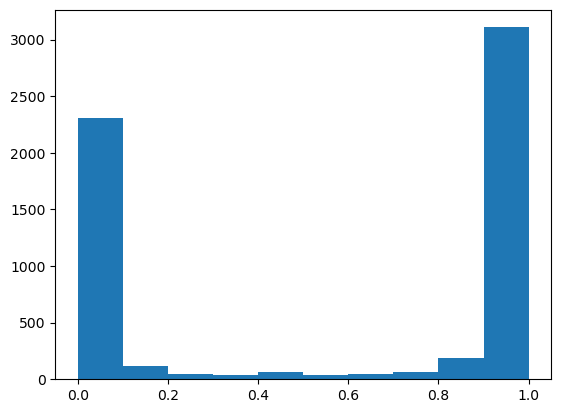

In [ ]:
tmp=y_pred.flatten()
plt.hist(tmp, bins = [0, 0.1, 0.2, 0.3, 0.4,0.5, 0.6, 0.7, 0.8, 0.9,1])

In [ ]:
#finding best threshold
max_acc=-1
best_thresh=0
for threshold in np.arange(0,1,0.05):
    tmp=y_pred
    tmp=np.where(tmp > threshold, 1,0)
    acc=accuracy_score(y_test,tmp)*100
    if acc>max_acc:
        max_acc=acc
        best_thresh=threshold
print("Best Accuracy: ",max_acc)
print("Best Threshold: ",best_thresh)

Best Accuracy:  85.71665285832643
Best Threshold:  0.9500000000000001


In [ ]:
y_pred=np.where(y_pred > best_thresh, 1,0)
confusion_matrix(y_test,y_pred)

array([[2870,  592],
       [ 270, 2303]])

In [ ]:
accuracy_score(y_test,y_pred)*100

85.71665285832643

## Hugging Face Approach

In [9]:
!pip install transformers

In [10]:
from transformers import DistilBertTokenizerFast
tokenizer=DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

In [11]:
from sklearn.model_selection import train_test_split

y = [str(value) for value in y]

x_train,x_test,y_train,y_test = train_test_split(list(x['title']),y,test_size=0.2,stratify=y,random_state=0)

In [12]:
train_encodings=tokenizer(x_train,truncation=True,padding=True)
test_encodings=tokenizer(x_test,truncation=True,padding=True)

In [13]:
train_encodings[0]

Encoding(num_tokens=63, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])

In [14]:
import tensorflow as tf

train_data = tf.data.Dataset.from_tensor_slices((dict(train_encodings),y_train))
test_data = tf.data.Dataset.from_tensor_slices((dict(test_encodings),y_test))

In [15]:
train_data

<_TensorSliceDataset element_spec=({'input_ids': TensorSpec(shape=(63,), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(63,), dtype=tf.int32, name=None)}, TensorSpec(shape=(), dtype=tf.string, name=None))>

In [16]:
from transformers import TFDistilBertForSequenceClassification, TFTrainer, TFTrainingArguments

training_args = TFTrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=2,              # total number of training epochs
    per_device_train_batch_size=8,  # batch size per device during training
    per_device_eval_batch_size=16,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
    eval_steps=100
)

In [ ]:
with training_args.strategy.scope():
    model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')

trainer = TFTrainer(model=model,args=training_args,train_dataset=train_data,eval_dataset=test_data)

trainer.train()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [16]:
y.value_counts()

0    15983
1    12277
Name: label, dtype: int64

In [ ]:
trainer.save_model('fake_news_model')

In [ ]:
trainer.evaluate(test_data)

In [ ]:
y_pred = trainer.predict(test_data)[1]

In [ ]:
accuracy_score(y_test,y_pred)*100